# Thyroid Cancer Recurrence Prediction Using Machine Learning


**Objective:** Predict thyroid cancer recurrence using patient clinical data.

This notebook demonstrates the complete ML pipeline including data preprocessing,
EDA, model training, evaluation, and feature importance analysis.


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

###  1. Load the Dataset
The dataset is loaded into a pandas DataFrame and the first few records are displayed to understand the data structure.

In [ ]:
# Load dataset
df = pd.read_csv('thyroid_cancer.csv')

# Display first 5 rows
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


### 2. Dataset Overview
This step examines the dataset’s dimensions, data types, summary statistics, and overall structure.

In [ ]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


### 3. Check for Missing Values and Duplicates
This cell identifies missing values and duplicate records to assess data quality.

In [ ]:
# Missing values
df.isnull().sum()

# Duplicate rows
df.duplicated().sum()

np.int64(19)

### 4. Remove Duplicate Records
Duplicate rows are removed to prevent biased learning and ensure data integrity.

In [ ]:
df = df.drop_duplicates()
df.shape

(364, 17)

### 5. Encode Binary Features
Binary categorical variables are converted into numerical format (0 and 1) to make them suitable for machine learning models.

In [ ]:
binary_cols = ['Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Adenopathy', 'Recurred']

for col in binary_cols:
    df[col] = df[col].map({'No': 0, 'Yes': 1})


### 6. Ordinal Encoding of Clinical Variables
Ordinal features such as risk level and cancer staging are encoded using meaningful numerical mappings that preserve their order.

In [ ]:
# Ordinal mappings
risk_map = {'Low': 0, 'Intermediate': 1, 'High': 2}
stage_map = {'I': 1, 'II': 2, 'III': 3}
n_map = {'N0': 0, 'N1': 1}
m_map = {'M0': 0, 'M1': 1}

df['Risk'] = df['Risk'].map(risk_map)
df['Stage'] = df['Stage'].map(stage_map)
df['N'] = df['N'].map(n_map)
df['M'] = df['M'].map(m_map)

### 7. Label Encoding of Nominal Features
Categorical features without an inherent order are transformed into numerical labels using label encoding.

In [ ]:
label_cols = ['Gender', 'Thyroid Function', 'Physical Examination',
              'Pathology', 'Focality', 'Response', 'T']

le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

### 8. Exploratory Data Analysis: Target Distribution
This visualization shows the distribution of cancer recurrence cases in the dataset.

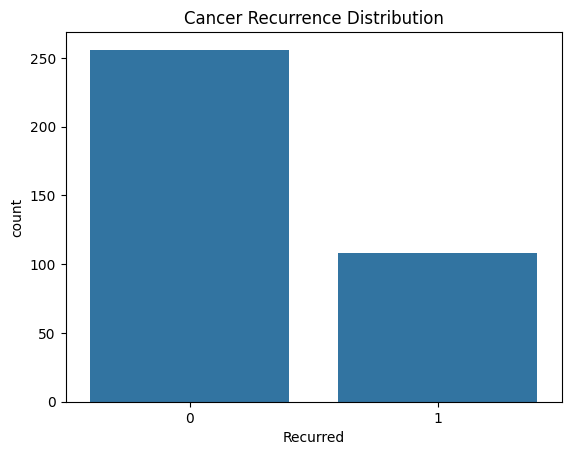

In [ ]:
sns.countplot(x='Recurred', data=df)
plt.title('Cancer Recurrence Distribution')
plt.show()

### 9. Separate Features and Target Variable
Independent variables (features) and the dependent variable (recurrence status) are separated for model training.

In [ ]:
X = df.drop('Recurred', axis=1)
y = df['Recurred']

### 10. Split Dataset into Training and Testing Sets
The dataset is split into training and testing sets while maintaining class balance using stratification.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 11. Verify Missing Values After Splitting
This step checks whether any missing values remain in the training and testing datasets.

In [ ]:
# Check missing values
X_train.isnull().sum().sum(), X_test.isnull().sum().sum()

(np.int64(186), np.int64(49))

### 12. Handle Missing Values Using Median Imputation
Missing values are replaced using median imputation to prepare the data for machine learning algorithms.

In [ ]:
# Impute missing values with median(use median imputation)
imputer = SimpleImputer(strategy='median')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


### 13. Restore DataFrame Structure
The imputed NumPy arrays are converted back into pandas DataFrames for easier analysis and interpretation.

In [ ]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

### 14. Final Verification of Missing Values
This step confirms that all missing values have been successfully handled.

In [ ]:
X_train.isnull().sum().sum(), X_test.isnull().sum().sum()

(np.int64(0), np.int64(0))

### 15. Train Logistic Regression Model
A Logistic Regression model is trained with balanced class weights to handle class imbalance in the dataset.

In [ ]:
lr = LogisticRegression(
    max_iter=1000,
    solver='liblinear',
    class_weight='balanced',
    random_state=42
)

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


### 16. Evaluate Logistic Regression Performance
The model is evaluated using accuracy, classification report, and confusion matrix visualization.

Logistic Regression Accuracy: 0.8493150684931506
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        51
           1       0.74      0.77      0.76        22

    accuracy                           0.85        73
   macro avg       0.82      0.83      0.82        73
weighted avg       0.85      0.85      0.85        73



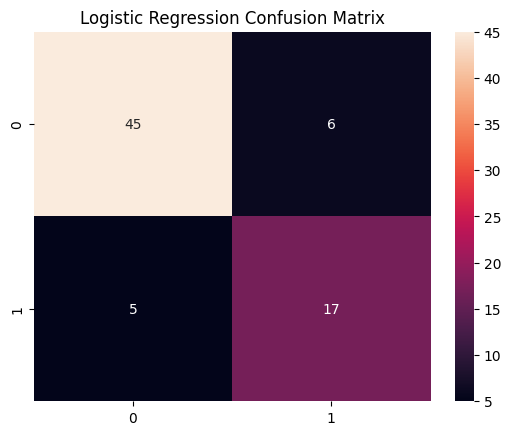

In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

### 17. Train Random Forest Classifier
A Random Forest model is trained to capture complex relationships between features and improve prediction performance.

In [ ]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


### 18. Evaluate Random Forest Performance
Model performance is evaluated using accuracy metrics, classification report, and confusion matrix.

Random Forest Accuracy: 0.958904109589041
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        51
           1       0.91      0.95      0.93        22

    accuracy                           0.96        73
   macro avg       0.95      0.96      0.95        73
weighted avg       0.96      0.96      0.96        73



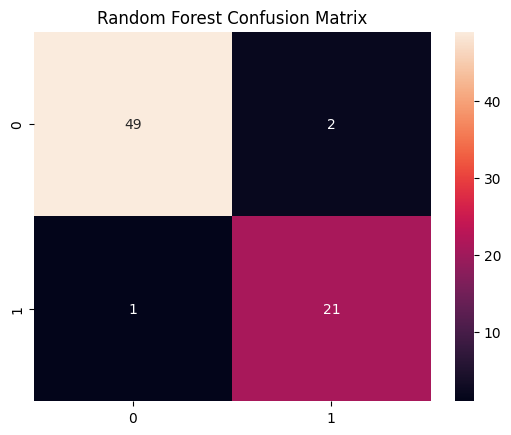

In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

### 19. Visualize Top Important Features
A bar chart is used to visualize the top features influencing the Random Forest model’s predictions.

In [ ]:
importances = rf.feature_importances_
features = X.columns

feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_df

,Feature,Importance
15,Response,0.433289
10,Risk,0.189536
11,T,0.126320
0,Age,0.069704
9,Focality,0.041550
14,Stage,0.029952
6,Physical Examination,0.026921
1,Gender,0.023113
8,Pathology,0.017158
5,Thyroid Function,0.015304


(Optional plot)

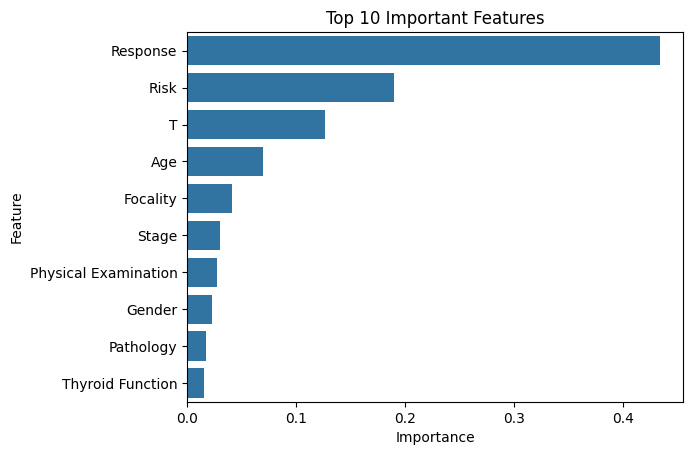

In [ ]:
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10))
plt.title('Top 10 Important Features')
plt.show()

## Conclusion

Random Forest outperformed Logistic Regression, especially in recall, making it more
suitable for thyroid cancer recurrence prediction. Feature importance analysis revealed
that treatment response, risk category, and cancer stage were the strongest predictors.


## Future Scope
- Hyperparameter tuning
- Larger datasets
- Explainable AI (SHAP/LIME)
- Web deployment using Streamlit